In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

* Cuantitativos 
    - Discretos: Available Extra Rooms in Hospital, staff_available, Age, Visitors with Patient, Stay (in days)
    - Continuos: Admission_Deposit
* Cualitativos
    - Nominales: Department, Ward_Facility_Code, doctor_name, gender, Type of Admission, health_conditions
    - Ordinales: Severity of Illness,
    - Binario: Insurance

In [40]:
df = pd.read_csv('df_trans_train.csv')

Como deseo predecir si sera una estadia larga o no, creo una nueva columna en base a 'Stay (in days)' segun si es mayor o igual a 8 es si (1) y no (0)

In [3]:
df.head()

,Available Extra Rooms in Hospital,staff_available,Severity of Illness,Visitors with Patient,Insurance,Admission_Deposit,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,...,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,gender_Female,gender_Male,gender_Other,estadia_larga
0,4,0,0,4,1,2966.408696,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,4,2,2,2,0,3554.835677,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,2,8,0,2,1,5624.733654,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,4,7,1,4,0,4814.149231,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,2,10,1,2,0,5169.269637,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1


## Correlacion entre columnas

Analizo la correlacion exitente entre columnas

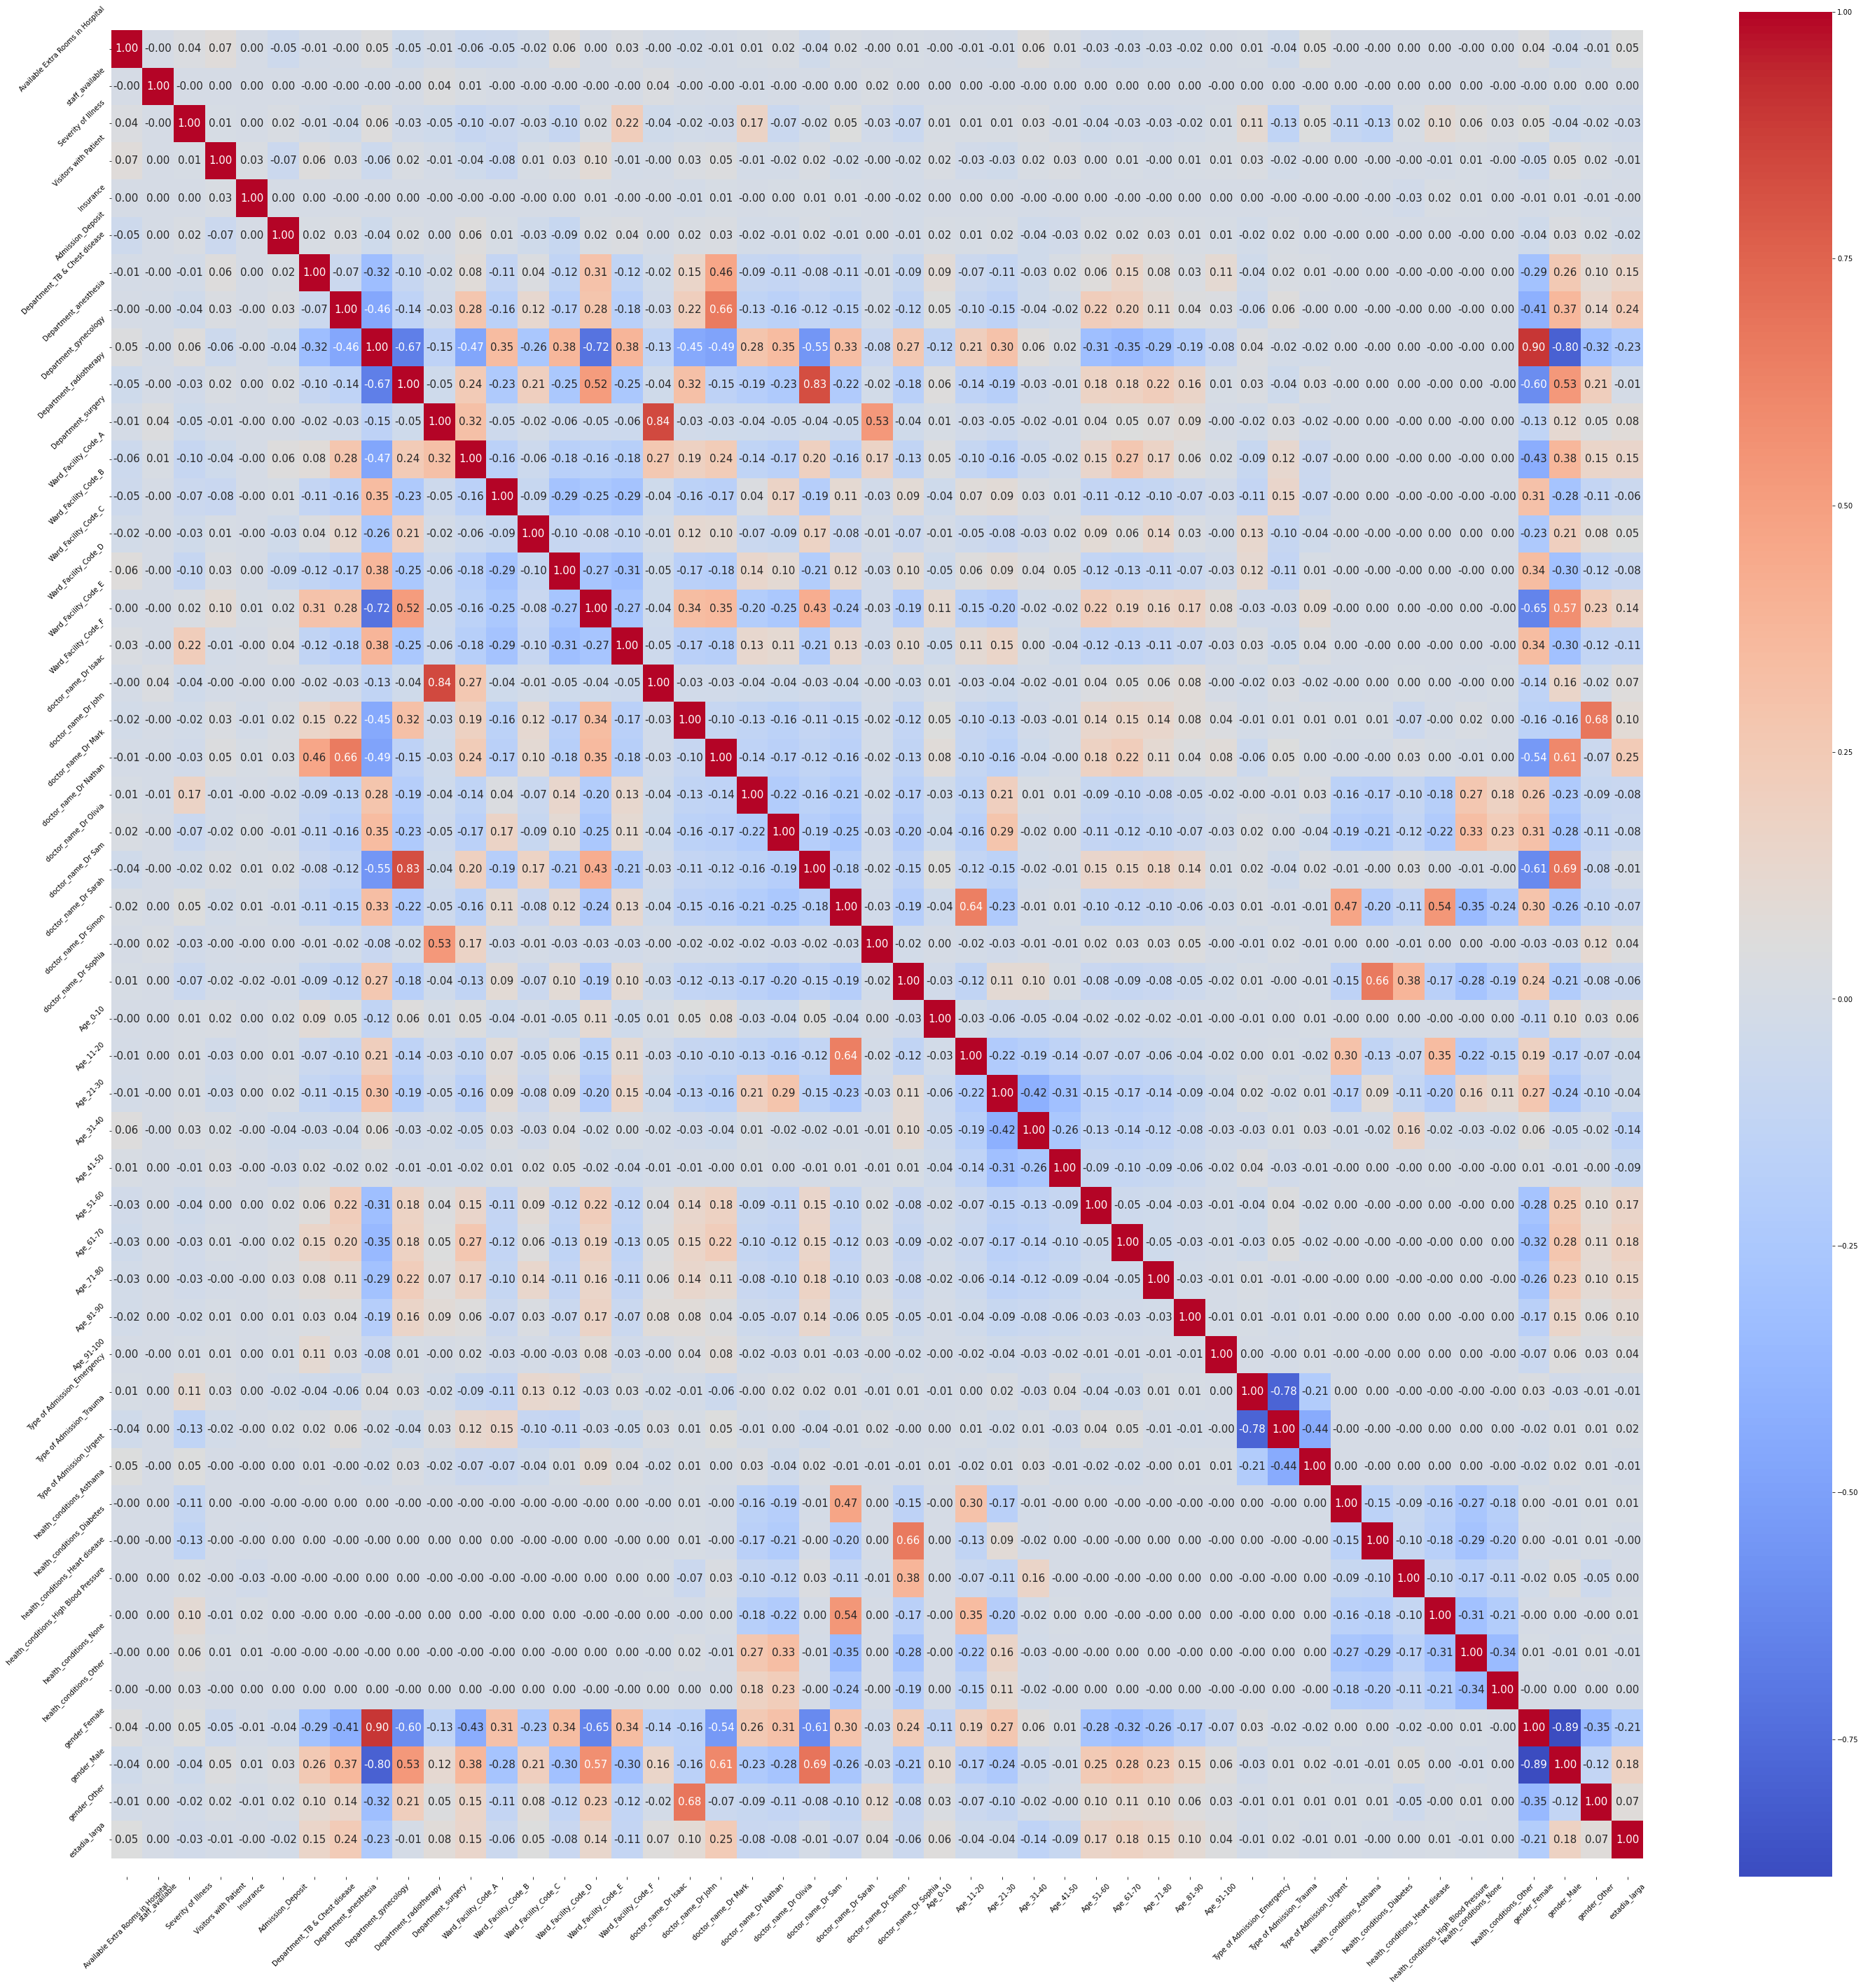

In [5]:
## corr
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(49,49))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
corr = df.corr()
plot_corre_heatmap(corr)

* las columnas relacionadas con el genero tienen buena o muy buena correlacion con varias columnas por lo que es comveniente elimnarlas.
* las columnas relacionadas con los nombres de los doctores pressentan bnuenas o muy buenac correlaciones con varias columns, puede ser devido a que ciertos doctores tienen cargos especificos en ciertas areas como pasa con la correlacion de Dr. Isaac y el departamento de rdiologia. Por lo que eliminare las columnas relacionadas a los doctores. 

* El departamento de anestecia tiene una corelacion baja y negativa con la gente entre 0 a 10 y 51 a 80 años (posiblemente por los riesgos de utilizar la anestecia a esa edad). Una correlacion baja y positiva en gente entre 11 a 30 años(posiblemente por el bajo riesgo de su utilizacion). La correlación con el codigo de sala es variado(puede ser debido a que segun el codigo es distinta la gravedad del paciente). Y la correlacion con los demas departamentos se puede relacionar con la necesidad de utilizar anestecia, por ejemplo, la correlacion con radioterapia es buena e inversa(posiblemente por la poca necesidad de anesteciar a los pacientes que deban ir al departamento de radioterapia). Pese a que las correlaciones son buenas, para mi la columna es necesaria para determinar la estadia del paciente.


In [6]:
df.columns

Index(['Available Extra Rooms in Hospital', 'staff_available',
       'Severity of Illness', 'Visitors with Patient', 'Insurance',
       'Admission_Deposit', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Ward_Facility_Code_A',
       'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D',
       'Ward_Facility_Code_E', 'Ward_Facility_Code_F', 'doctor_name_Dr Isaac',
       'doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan',
       'doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah',
       'doctor_name_Dr Simon', 'doctor_name_Dr Sophia', 'Age_0-10',
       'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60',
       'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'health_conditions_Asthama',
       'health_conditions_D

In [11]:
df.drop(['Available Extra Rooms in Hospital','staff_available','Insurance','Admission_Deposit'],axis=1,inplace=True)#,'gender','Ward_Facility_Code''doctor_name'

In [50]:
df.drop(['Available Extra Rooms in Hospital', 'staff_available',
       'Severity of Illness', 'Visitors with Patient', 'Insurance',
       'Admission_Deposit'],axis=1,inplace=True)

In [42]:
df.drop(['Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery'],axis=1,inplace=True)

In [12]:
df.drop([ 'Ward_Facility_Code_A',
       'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D',
       'Ward_Facility_Code_E', 'Ward_Facility_Code_F'],axis=1,inplace=True)

In [31]:
df.drop(['doctor_name_Dr Isaac',
       'doctor_name_Dr John', 'doctor_name_Dr Mark', 'doctor_name_Dr Nathan',
       'doctor_name_Dr Olivia', 'doctor_name_Dr Sam', 'doctor_name_Dr Sarah',
       'doctor_name_Dr Simon', 'doctor_name_Dr Sophia'],axis=1,inplace=True)

In [52]:
df.drop(['Age_0-10',
       'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60',
       'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100'],axis=1,inplace=True)

In [32]:
df.drop(['Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent'],axis=1,inplace=True)

In [44]:
df.drop(['health_conditions_Asthama',
       'health_conditions_Diabetes','health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other'],axis=1,inplace=True)

In [41]:
df.drop(['gender_Female', 'gender_Male','gender_Other'],axis=1,inplace=True)

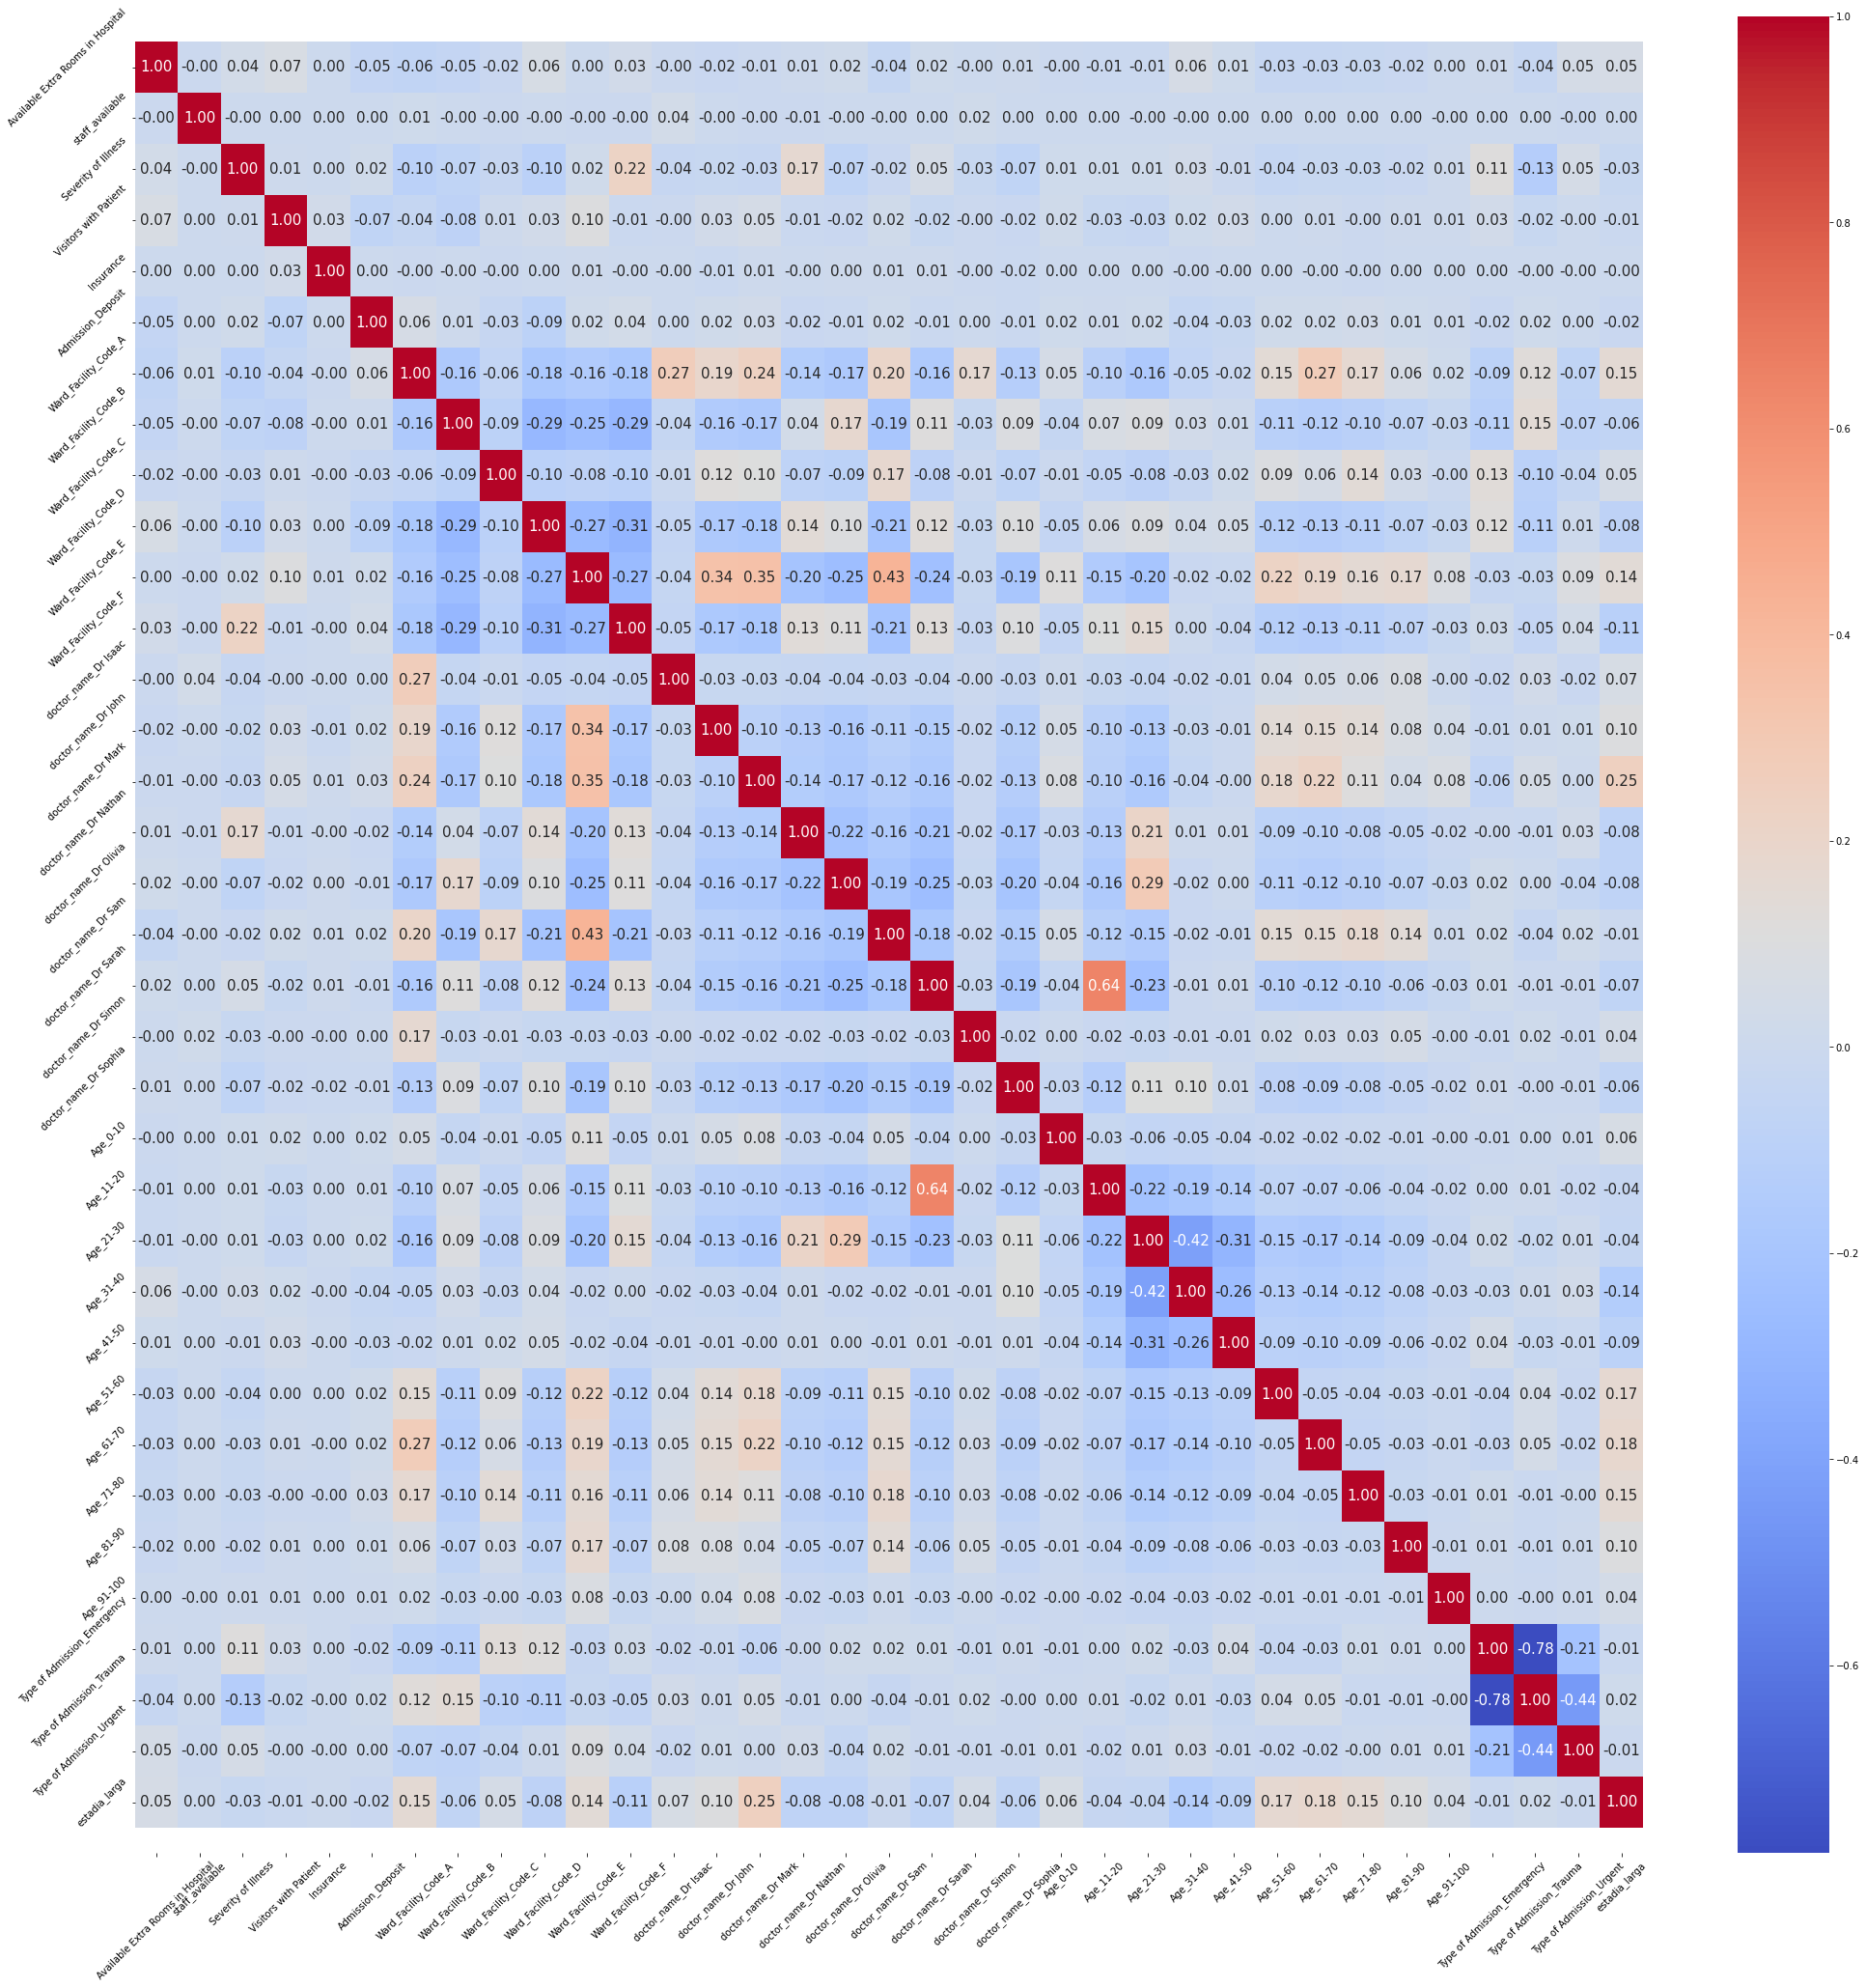

In [45]:
## corr
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(df.shape[1],df.shape[1]))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
corr = df.corr()
plot_corre_heatmap(corr)

In [46]:
df.shape

(410000, 35)

In [47]:
df.to_csv('df_para_modelo.csv',index=False)

### Descripcion Estadistica

como es la columna 'Admission_Deposit'?

que tan agrupados y dispersos estan mis datos(std,rango intercuartil)

### analisis univariado

histograma y boxplot : variables numericas
barras: variable categoricas

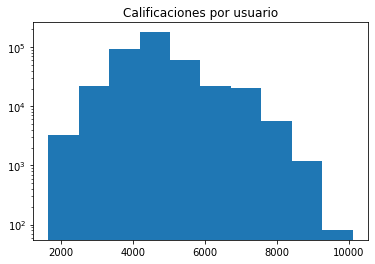

In [8]:
plt.hist(df.Admission_Deposit, log= True)
plt.title('Calificaciones por usuario')
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_19772\1189687010.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Available Extra Rooms in Hospital'], bins = 10, label = 'Train')


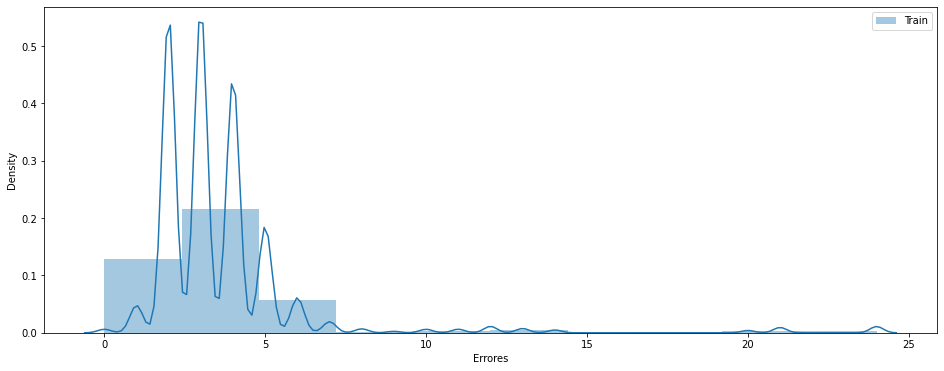

In [9]:
plt.figure(figsize = (16,6))

sns.distplot(df['Available Extra Rooms in Hospital'], bins = 10, label = 'Train')
plt.xlabel('Errores')
plt.legend()

### Balance de la variable de salida

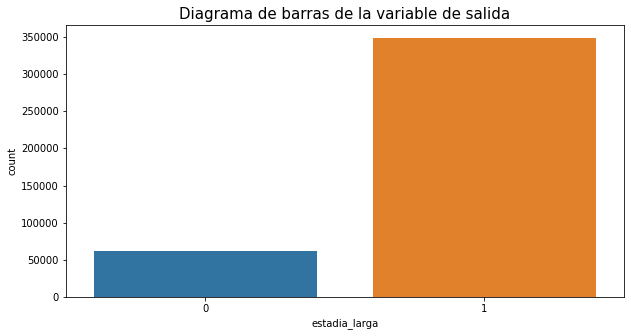

In [20]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción
plt.figure(figsize=(10,5))
sns.countplot(x = 'estadia_larga' ,label= 'Count', data = df)#equivelante a sns.countplot(df.nom_columna)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

## Finalmente elegiimos los feature

In [14]:
col_elim = ['Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery','Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent','health_conditions_Asthama',
       'health_conditions_Diabetes','health_conditions_Heart disease',
       'health_conditions_High Blood Pressure', 'health_conditions_None',
       'health_conditions_Other','gender_Female', 'gender_Male','gender_Other']